In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [58]:
# The forecast function is defined here
def forecast(x,y,x0):
    b1 = 0
    b2 = 0
    a = []
    for i in range(len(x)):
        b1 += (np.mean(x)- x[i]) * (np.mean(y) - y[i])
        b2 += (np.mean(x)- x[i])**2
    b = b1/b2
    
    a = np.mean(y) - (b * np.mean(x))
    return a + (b*x0)

In [59]:
# The steyx function is defined
def steyx(x,y):
    n = len(x)
    b1 = 0
    b2 = 0
    b3 = 0
    df = 1/(n-2)
    for i in range(len(x)):
        b1 += (np.mean(x) - x[i]) * (np.mean(y) - y[i])
        b2 += (np.mean(x) - x[i])**2
        b3 += (np.mean(y) - y[i])**2
        Y = b3 - b1**2/b2
    return np.sqrt(df * Y)
        
       

In [60]:
#Returns the sum of squares of deviations of data points from their sample mean
def devsq(x):
    ssx = 0
    for i in range(len(x)):
        ssx += (np.mean(x) - x[i])**2
    return ssx

In [61]:
#The T critical value

def t_crit(df,alpha):
    return stats.t.ppf(1-alpha/2, df)

In [62]:
#Getting the confidence bands for the confidence level 1-alpha

def conf_bands(x,y,alpha):
    n = len(x)
    lw = []
    up = []
    df = n -2
    tcrit = t_crit(df,alpha)
    for i in range(len(x)):
        fr = forecast(x,y,x[i])
        sty = steyx(x,y) * np.sqrt(1/n + (x[i] - np.mean(x))**2/devsq(x))
        lw.append(fr - tcrit*sty)
        up.append(fr + tcrit*sty)
    return lw, up
        


In [63]:
#The example from the excel file is plotted here

In [64]:
cig = [5, 23, 25, 48, 17, 8, 4, 26, 11, 19, 14, 35, 29, 4, 23]
Life_exp = [80, 78, 60, 53, 85, 84, 73, 79, 81, 75, 68, 72, 58, 92, 65]

In [65]:
x,y = conf_bands(cig,Life_exp,0.01)
x1,y1 = conf_bands(cig,Life_exp,0.05)


In [66]:
ciglo,x_lo=map(list, zip(*sorted(zip(cig,x))))
cighi,x_hi=map(list, zip(*sorted(zip(cig,y))))
ciglo1,x_lo1=map(list, zip(*sorted(zip(cig,x1))))
cighi1,x_hi1=map(list, zip(*sorted(zip(cig,y1))))


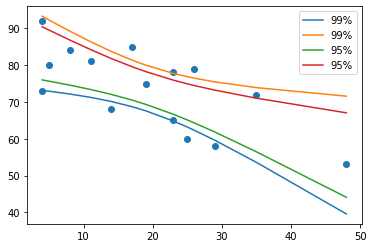

In [67]:
plt.scatter(cig,Life_exp)
plt.plot(ciglo,x_lo,label='99%')
plt.plot(cighi,x_hi,label='99%')
plt.plot(ciglo1,x_lo1,label='95%')
plt.plot(cighi1,x_hi1,label='95%')
plt.legend()